# TSM_AppElm Labo02 
## conception d'une antenne

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def findMin(data):
    val = np.min(data[:,1])
    index = np.where(val == data[:,1])
    return data[index]

def findBP(data):
    tab = np.where(data[:,1] < -10)
    BPmin = data[tab[0][0]][0]
    BPmax = data[tab[0][len(tab[0])-1]][0]
    return BPmin, BPmax

def findFreq(data,f,offset=0.06):
    tab = np.where((data[:,0] < f+offset) & (data[:,0] > f-offset))
    tab2 = data[tab[0]]
    return np.mean(tab2[:,1])
    

In [3]:
dataFR4 = pd.read_csv('result_navigator_fr4_ok.csv',sep=';')
dataFR4


,3D Run ID,L,e,h,i,l1,ls,wl,ws
0,1,39.0,0.035,1.6,0.8,4.0,120.0,1.7,30.0
1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(array([[  2.46399999, -14.23558794]]),
 (2.3599998950958, 2.5759999752045),
 -13.489643818353235)

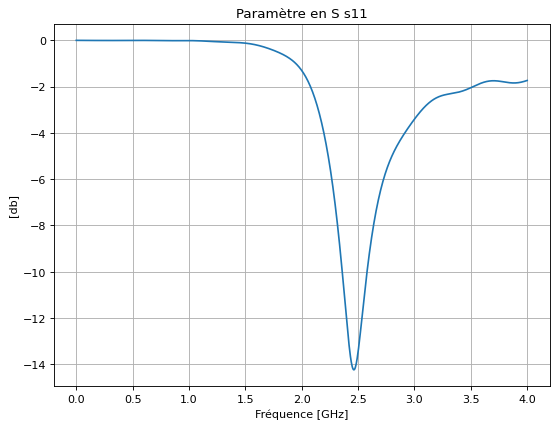

In [10]:
S11_fr4 = np.genfromtxt('antenne_FR4_mode1.txt',delimiter='\t',skip_header=1)
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(S11_fr4[:,0], S11_fr4[:,1])
plt.grid()
plt.xlabel("Fréquence [GHz]")
plt.ylabel("[db]")
plt.title("Paramètre en S s11")

findMin(S11_fr4), findBP(S11_fr4), findFreq(S11_fr4,2.45)

## Partie 2 avec de la ceramique

In [5]:
dataCER = pd.read_csv('result_navigator_cer_ok.csv',sep=';')
dataCER
#valeur ok 19

,3D Run ID,L,i,l1,ls,wl,ws
0,1,40.0,0.5,7.65306,100.0,0.2,30.0
1,2,30.0,0.5,7.65306,100.0,0.2,30.0
2,3,27.0,0.5,7.65306,100.0,0.2,30.0
3,4,33.0,0.5,7.65306,100.0,0.2,30.0
4,5,32.0,0.5,7.65306,100.0,0.2,30.0
5,6,32.0,0.5,7.65306,100.0,2.0,30.0
6,7,32.0,1.5,7.65306,100.0,2.0,30.0
7,8,75.0,1.5,7.65306,100.0,2.0,30.0
8,9,75.0,1.5,20.40820,100.0,2.0,50.0
9,10,75.0,0.8,20.40820,100.0,2.0,50.0


(array([[  2.51200008, -12.99334341]]),
 (2.4000000953674, 2.6400001049042),
 -11.715565969702753)

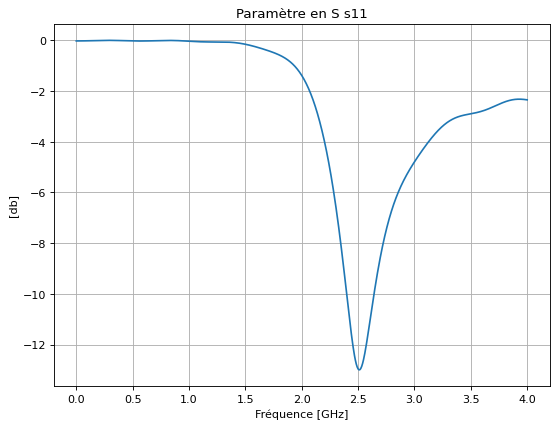

In [11]:
S11_cer = np.genfromtxt('antenne_CER_mode1.txt',delimiter='\t',skip_header=1)
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(S11_cer[:,0], S11_cer[:,1])
plt.grid()
plt.xlabel("Fréquence [GHz]")
plt.ylabel("[db]")
plt.title("Paramètre en S s11")

findMin(S11_cer), findBP(S11_cer), findFreq(S11_cer,2.45)